In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.api import families
from statsmodels.formula.api import ols, glm
import matplotlib.pyplot as plt
df = pd.read_parquet("../data/curated/result_df.parquet")
df

Assumptions for linear regression

·linear relation ship between x,y : kind of fine

·independence: good except time of day may have some influence on snow

·same variance of residuals for x   : need residual vs fitter

·residuals follow normal distribution : need qq plot

In [ ]:
# the large size of df may probably make kernal crush you could
# try add one more zero for sample, after adding, the model
# fitting time should be round to 60s
sample_df = df.sample(100000,random_state= 123)

In [ ]:
mod = ols(formula = 'earning_efficiency ~ log_trip_distance + C(PULocationID) + C(time_of_day) + C(day_of_week) + C(snow)'
    , data=sample_df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:     earning_efficiency   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:32:45   Log-Likelihood:                -39141.
No. Observations:              100000   AIC:                         7.871e+04
Df Residuals:                   99787   BIC:                         8.073e+04
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

In [ ]:
mod2 = ols(formula = 'earning_efficiency ~ log_trip_distance + C(PULocationID) + C(time_of_day) + C(day_of_week)'
    , data=sample_df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:     earning_efficiency   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:32:51   Log-Likelihood:                -39155.
No. Observations:              100000   AIC:                         7.873e+04
Df Residuals:                   99788   BIC:                         8.075e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

Text(0, 0.5, 'residuals')

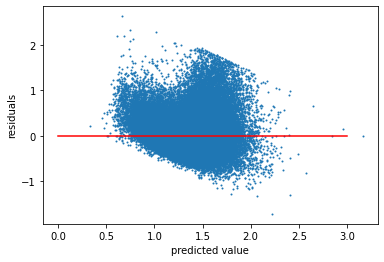

In [ ]:
# plot res vs fitted graph for checking variance of residual
fit = mod.fittedvalues
res = sample_df['earning_efficiency']-pred
plt.plot([0,3],[0,0],c='red')
plt.scatter(pred,res,s=1) 
plt.xlabel('fitted value')
plt.ylabel('residuals')

<function matplotlib.pyplot.show(close=None, block=None)>

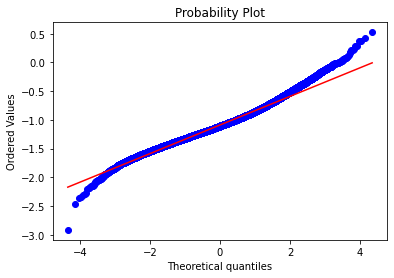

In [ ]:
# qq plot to see if the distribution of residuals is normal
import scipy as sp
sp.stats.probplot(res,plot = plt)
plt.show